### Student Information
Name: 曾世賢

Student ID: 112006274

GitHub ID: Bakuretsu05 (50520529)

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### Begin Assignment Here

## TODO
**Phase 1**
1. Data Source
2. Data Preparation
3. Data Transformation
 - 3.1 Converting Dictionary into Pandas dataframe
 - 3.2 Familiarizing yourself with the Data
4. Data Mining using Pandas
 - 4.1 Dealing with Missing Values
 - 4.2 Dealing with Duplicate Data
5. Data Preprocessing
 - 5.1 Sampling
 - 5.2 Feature Creation
 - 5.3 Feature Subset Selection
 - 5.4 Atrribute Transformation / Aggregation
   - 5.4.1 Transform Text Data

In [1]:
# Import all the necessary libraries

import pandas as pd
import numpy as np
import math
import plotly.express as px
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download("punkt") 
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\marvi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Data Preparation & Transformation

In [2]:
# Import data
df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")

# note that pd.read_csv turns a csv into a dataframe

# List of relevant columns
columns = ['text', 'title', 'label', 'subreddit', 'upvotes', 'subjectivity', 'polarity', 'sentiment']

df = df[columns].copy()
df

,text,title,label,subreddit,upvotes,subjectivity,polarity,sentiment
0,Calls on retards,Retardation is on the menu boys! WSB is so back,-1.0,wallstreetbets,0,1.000000,-0.900000,-1.0
1,Stunt as in like why did they even make a big ...,Retail giant TARGET has now declined for 10 co...,0.0,wallstreetbets,-15,0.177778,0.083333,1.0
2,Seeing lots of red in the ticker.,How do you feel about a sitting president maki...,0.0,StockMarket,1,0.000000,0.000000,0.0
3,Vision Marine Technologies Inc. is rewriting t...,Who knows more? $VMAR,1.0,stockstobuytoday,30,0.646970,0.216383,1.0
4,He didn’t say thank you.,The Trump administration is begging Xi Jinping...,-1.0,StockMarket,1,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
842,Invest now it is going to shoot up tomorrow,$MRIN Marin Software killed it today. Hope som...,1.0,stockstobuytoday,1,0.000000,0.000000,0.0
843,Where can I read this?,$ U.S. dollar value (crashing),0.0,StockMarket,2,0.000000,0.000000,0.0
844,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",Analyst Recommendations,0.0,stockstobuytoday,1,0.000000,0.000000,0.0
845,i sold my puts so i expect cheeto to declare w...,Weekend Discussion Thread for the Weekend of A...,-1.0,wallstreetbets,10,0.000000,0.000000,0.0


In [3]:
# Exercise 1: Print out the text data for the first three samples in the datasetfor i in range(0,3):
for i in range(0, 3):
    print(f"========= Example {i + 1}: =========")
    print(f"Title: {df.loc[i, 'title']}")
    print(f"Subreddit: r/{df.loc[i, 'subreddit']}")
    print(f"Text: {df.loc[i, 'text']}")
    print(f"Sentiment: {df.loc[i, 'sentiment']}\n")

========= Example 1: =========
Title: Retardation is on the menu boys! WSB is so back
Subreddit: r/wallstreetbets
Text: Calls on retards
Sentiment: -1.0

========= Example 2: =========
Title: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Subreddit: r/wallstreetbets
Text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Sentiment: 1.0

========= Example 3: =========
Title: How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Subreddit: r/StockMarket
Text: Seeing lots of red in the ticker.
Sentiment: 0.0



In [4]:
# Exercise 2: Experimenting with querying techniques

# Axes left out of the specs will be assumed as :
# here we are querying all the columns
df.loc[:10]

# Extract the 'text' column
df_text_ = df['text']

# Access the second text
df_text_[2]

# rows where category is 'wallstreetbets' and text contains 'stock'
mask = (df['subreddit'] == 'wallstreetbets') & df['text'].str.contains('stock', case=False, na=False)
result = df.loc[mask, ['text', 'subreddit']]

result

,text,subreddit
305,You can evaluate the price of a company by loo...,wallstreetbets
327,Yippee..... If the US dollar goes to zero then...,wallstreetbets


In [5]:
# Exercise 3: Try to fetch records belonging to the 'StockMarket' subreddit, and query every 10th record. Only show the first 5 records.
df[df["subreddit"] == "StockMarket"][::10][:5]

,text,title,label,subreddit,upvotes,subjectivity,polarity,sentiment
2,Seeing lots of red in the ticker.,How do you feel about a sitting president maki...,0.0,StockMarket,1,0.00,0.00,0.0
62,Comedy gold :)),The Trump administration is begging Xi Jinping...,-1.0,StockMarket,1,1.00,0.50,1.0
94,I can’t take four years of lying. Help!,Trump: We Are Doing Really Well On Our Tariff ...,0.0,StockMarket,1,0.00,0.00,0.0
113,\r\nAn evil man will burn his own nation to th...,🚨China responds to Trump’s 145% tariff with an...,0.0,StockMarket,2,1.00,-1.00,-1.0
146,He reached this level only because of his inhe...,$ U.S. dollar value (crashing),-1.0,StockMarket,1,0.25,0.25,1.0


In [6]:
# Check for missing values in the dataset
print(df.isnull())
df.isnull().apply(lambda x: dmh.check_missing_values(x))

      text  title  label  subreddit  upvotes  subjectivity  polarity  \
0    False  False  False      False    False         False     False   
1    False  False  False      False    False         False     False   
2    False  False  False      False    False         False     False   
3    False  False  False      False    False         False     False   
4    False  False  False      False    False         False     False   
..     ...    ...    ...        ...      ...           ...       ...   
842  False  False  False      False    False         False     False   
843  False  False  False      False    False         False     False   
844  False  False  False      False    False         False     False   
845  False  False  False      False    False         False     False   
846  False  False  False      False    False         False     False   

     sentiment  
0        False  
1        False  
2        False  
3        False  
4        False  
..         ...  
842      False  

,text,title,label,subreddit,upvotes,subjectivity,polarity,sentiment
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0


In [7]:
# Exercise 4: Calculate missing values in every record
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [8]:
# Check for duplicates
df.duplicated()
sum(df.duplicated())

21

it seems like we have 21 duplicates, so we are gonna drop the duplicates from the dataset

In [9]:
# Drop the duplicates
print(f"Length before dropping duplicates: {len(df)}")
df.drop_duplicates(keep=False, inplace=True)
print(f"Length after dropping duplicates: {len(df)}")

Length before dropping duplicates: 847
Length after dropping duplicates: 817


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

subreddit
stocks              274
StockMarket         250
wallstreetbets      149
stockstobuytoday    144
Name: count, dtype: int64


<Axes: title={'center': 'Subreddit Distribution'}, xlabel='subreddit'>

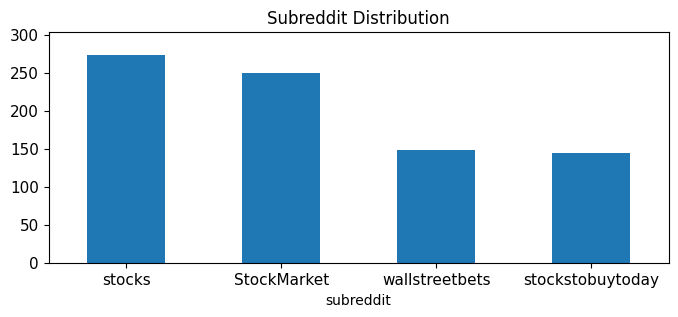

In [11]:
# Exercise 7?: Plot the subreddit distribution
print(df.subreddit.value_counts())
df.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit Distribution',
                                    ylim = [0, df.subreddit.value_counts().max() + 30],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### Data Preprocessing

In [12]:

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.text) #learn the vocabulary and return document-term matrix
print(df_counts[0])

count_vect.get_feature_names_out()[3123]

  (np.int32(0), np.int32(689))	1
  (np.int32(0), np.int32(2682))	1
  (np.int32(0), np.int32(3222))	1


'recreation'

In [13]:
# Exercise 9: Analyze the first record
analyze = count_vect.build_analyzer()
analyze(df.text[0])

['calls', 'on', 'retards']

In [14]:
# Exercise 10 
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [15]:
row = df_counts[3]
nonzero_indices = row.nonzero()[1]
feature_names = count_vect.get_feature_names_out()
word = feature_names[nonzero_indices[0]]
print(word)

on


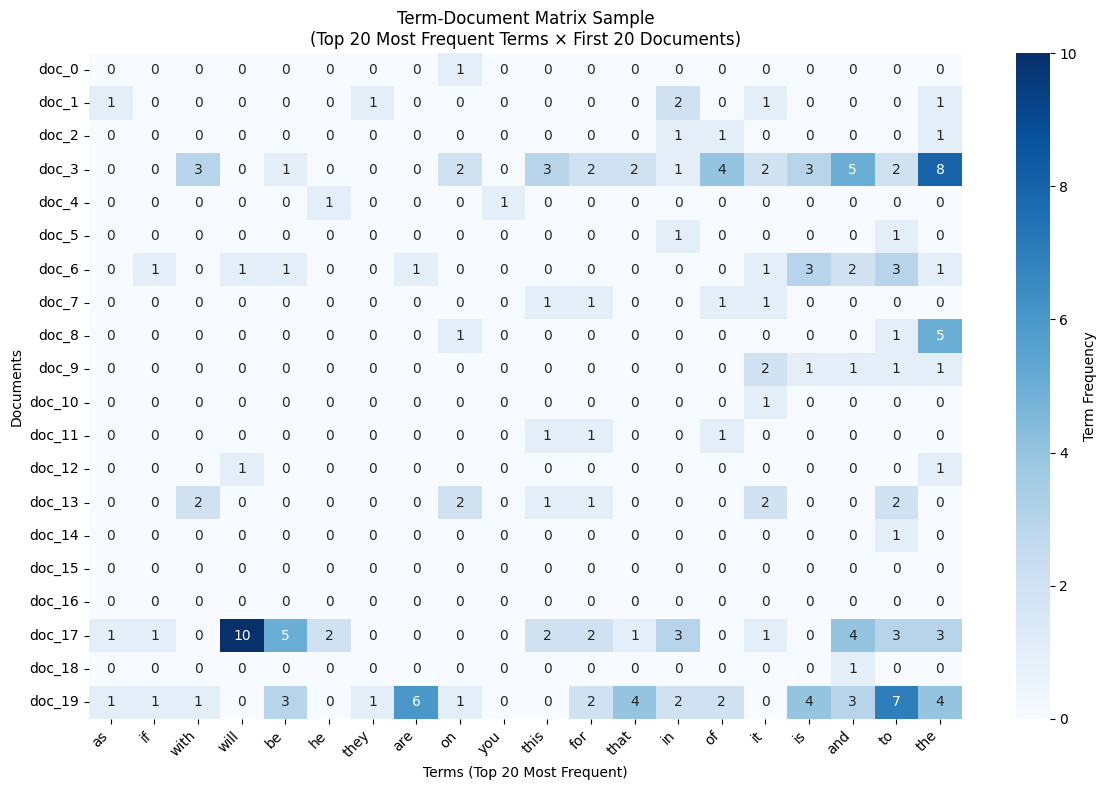

"\nThis visualization approach focuses on the most commonly occurring terms\nin the document collection because they offer superior insights into the\noverall data characteristics. By concentrating on high-frequency terms,\nwe can identify meaningful patterns in word usage across documents,\nrather than being overwhelmed by rare terms that appear in very few\ndocuments. This selective approach provides a clearer representation\nof the dataset's linguistic content and structure.\n"

In [16]:
# Exercise 11

# Calculate term frequencies across all documents
term_frequencies = np.array(df_counts.sum(axis=0)).flatten()

# Get indices of the top 20 most frequent terms
top_20_indices = term_frequencies.argsort()[-20:]

# Extract the vocabulary for these top 20 terms
top_20_terms = count_vect.get_feature_names_out()[top_20_indices]

# Create a sample matrix: first 20 documents × top 20 terms
sample_matrix = df_counts[:20, top_20_indices].toarray()

# Create DataFrame for visualization
df_sample = pd.DataFrame(
    sample_matrix, 
    columns=top_20_terms,
    index=[f"doc_{i}" for i in range(20)]
)

# Create heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_sample, 
    cmap="Blues", 
    annot=True, 
    fmt="d",
    cbar_kws={'label': 'Term Frequency'}
)

plt.title('Term-Document Matrix Sample\n(Top 20 Most Frequent Terms × First 20 Documents)')
plt.xlabel('Terms (Top 20 Most Frequent)')
plt.ylabel('Documents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

"""
This visualization approach focuses on the most commonly occurring terms
in the document collection because they offer superior insights into the
overall data characteristics. By concentrating on high-frequency terms,
we can identify meaningful patterns in word usage across documents,
rather than being overwhelmed by rare terms that appear in very few
documents. This selective approach provides a clearer representation
of the dataset's linguistic content and structure.
"""


In [17]:
# Exercise 12
import plotly.express as px

# Calculate word occurrence counts across the entire document collection
word_counts = np.array(df_counts.sum(axis=0)).flatten()

# Choose the first 300 vocabulary items (adjustable to 50/100 for better performance)
vocabulary_items = count_vect.get_feature_names_out()[:300]
word_frequencies = word_counts[:300]

# Generate an interactive frequency visualization
chart = px.bar(
    x=vocabulary_items,
    y=word_frequencies,
    labels={'x': "Vocabulary Terms", 'y': "Occurrence Count"},
    title="Frequency Distribution of Top 300 Vocabulary Terms",
)

# Improve label readability by rotating them
chart.update_layout(xaxis_tickangle=90, width=1200, height=600)

chart.show()

In [18]:
# Exercise 13
word_occurrence_counts = np.array(df_counts.sum(axis=0)).flatten()

selected_count = 50
most_common_indices = word_occurrence_counts.argsort()[-selected_count:]  # positions of top N items
most_common_words = count_vect.get_feature_names_out()[most_common_indices]
word_counts_for_selection = word_occurrence_counts[most_common_indices]

import plotly.express as px

visualization = px.bar(
    x=most_common_words,
    y=word_counts_for_selection,
    labels={'x': "Vocabulary Items", 'y': "Occurrence Count"},
    title=f"Most Frequent {selected_count} Terms in Document Collection"
)
visualization.update_layout(xaxis_tickangle=90, width=900, height=500)
visualization.show()


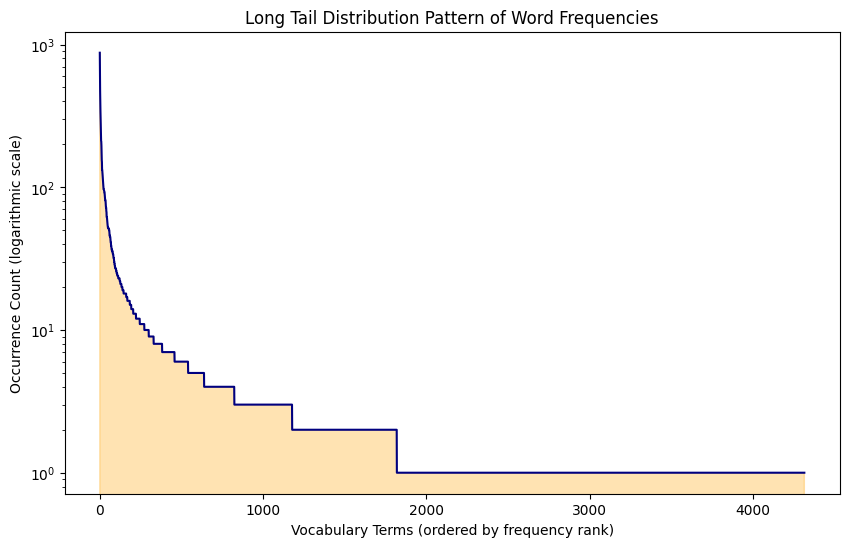

In [19]:
# Exercise 14
# Calculate word occurrence counts across all documents
word_counts = np.array(df_counts.sum(axis=0)).flatten()

# Arrange in descending order of frequency
descending_counts = np.sort(word_counts)[::-1]

# Create long tail distribution visualization
plt.figure(figsize=(10,6))
plt.plot(descending_counts, color="navy")
plt.fill_between(range(len(descending_counts)), descending_counts, alpha=0.3, color="orange")

plt.yscale("log")  # logarithmic scale reveals the long tail pattern more clearly
plt.title("Long Tail Distribution Pattern of Word Frequencies")
plt.xlabel("Vocabulary Terms (ordered by frequency rank)")
plt.ylabel("Occurrence Count (logarithmic scale)")
plt.show()

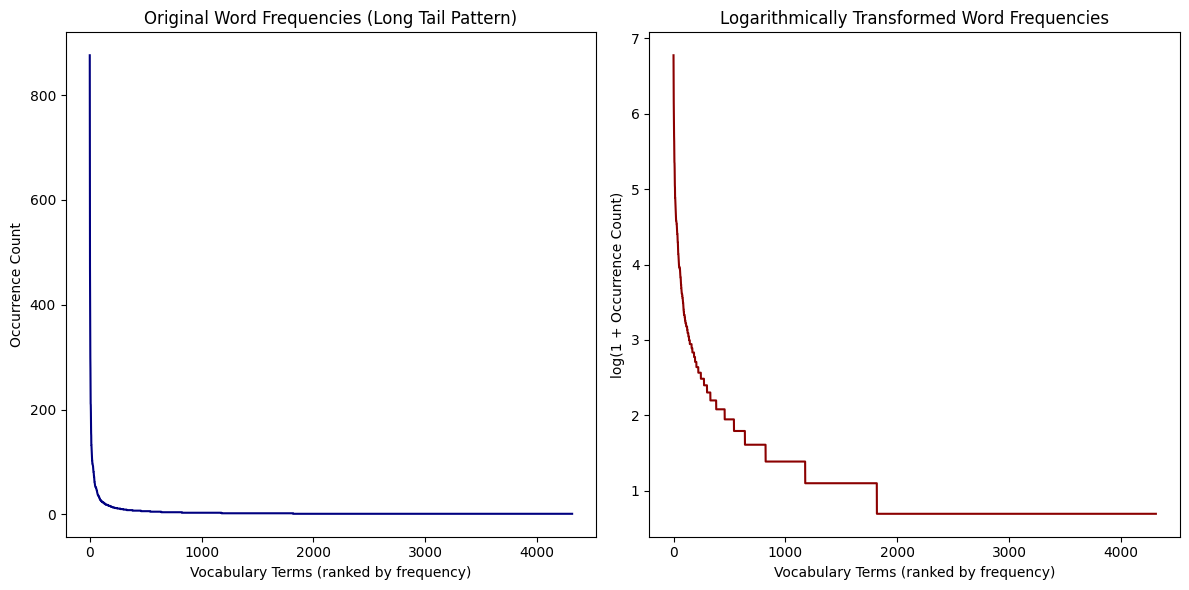

'\nThe original distribution is heavily skewed by a small number of extremely common words,\nmaking it difficult to observe the extended tail of less common vocabulary items.\nThe logarithmically transformed visualization compresses the high-frequency values\nand amplifies the low-frequency values, exposing greater detail in the long tail region.\n'

In [20]:
# Exercise 15
# Calculate word occurrence counts across all documents
word_counts = np.array(df_counts.sum(axis=0)).flatten()
descending_counts = np.sort(word_counts)[::-1]

# Apply logarithmic transformation (log1p prevents log(0) problems)
log_transformed_counts = np.log1p(descending_counts)

# Create side-by-side comparison visualization
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(descending_counts, color="navy")
plt.title("Original Word Frequencies (Long Tail Pattern)")
plt.xlabel("Vocabulary Terms (ranked by frequency)")
plt.ylabel("Occurrence Count")

plt.subplot(1,2,2)
plt.plot(log_transformed_counts, color="darkred")
plt.title("Logarithmically Transformed Word Frequencies")
plt.xlabel("Vocabulary Terms (ranked by frequency)")
plt.ylabel("log(1 + Occurrence Count)")

plt.tight_layout()
plt.show()

"""
The original distribution is heavily skewed by a small number of extremely common words,
making it difficult to observe the extended tail of less common vocabulary items.
The logarithmically transformed visualization compresses the high-frequency values
and amplifies the low-frequency values, exposing greater detail in the long tail region.
"""

### Correlation Heatmap

In [21]:
# Create a new feature
df["text_length"] = df["text"].str.len()

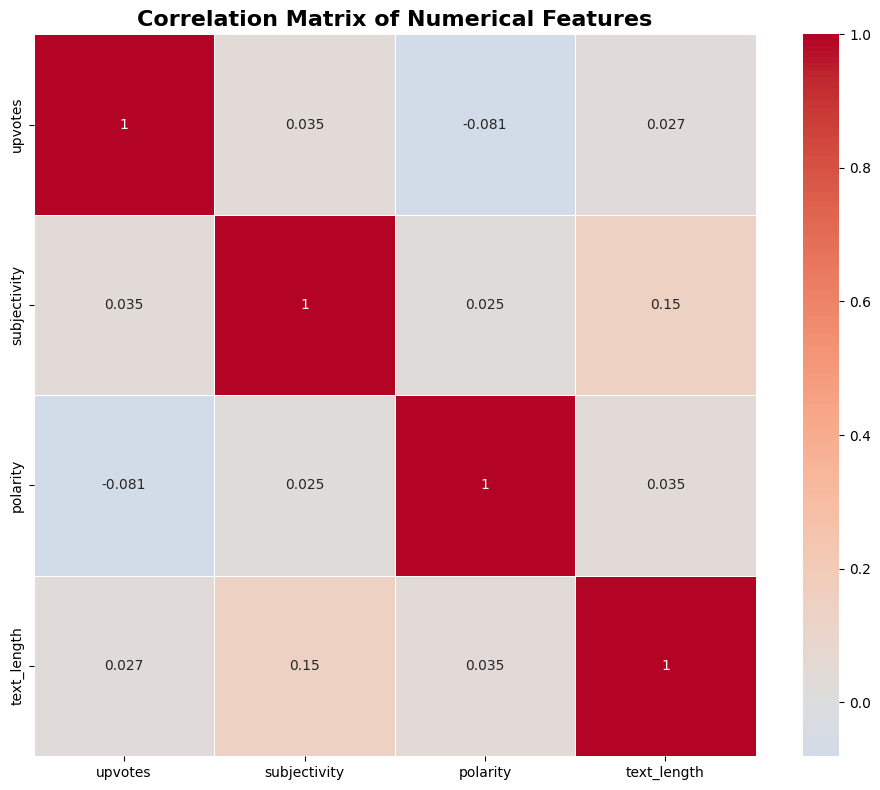

In [22]:
# Create correlation analysis for numerical features
numerical_features = ['upvotes', 'subjectivity', 'polarity', 'text_length']

# Create correlation matrix
correlation_matrix = df[numerical_features].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

All pairwise correlations are tiny (≈ −0.08 to +0.15), so there’s no strong linear link between upvotes and sentiment (polarity/subjectivity) or text length, and only a weak hint that longer texts are slightly more subjective (~0.15). That suggests (1) effects, if any, are small; (2) relationships may be non-linear or masked by confounders (subreddit, time of day, ticker, author karma)

### Sentiment Distribution by Subreddit

<Figure size 1200x800 with 0 Axes>

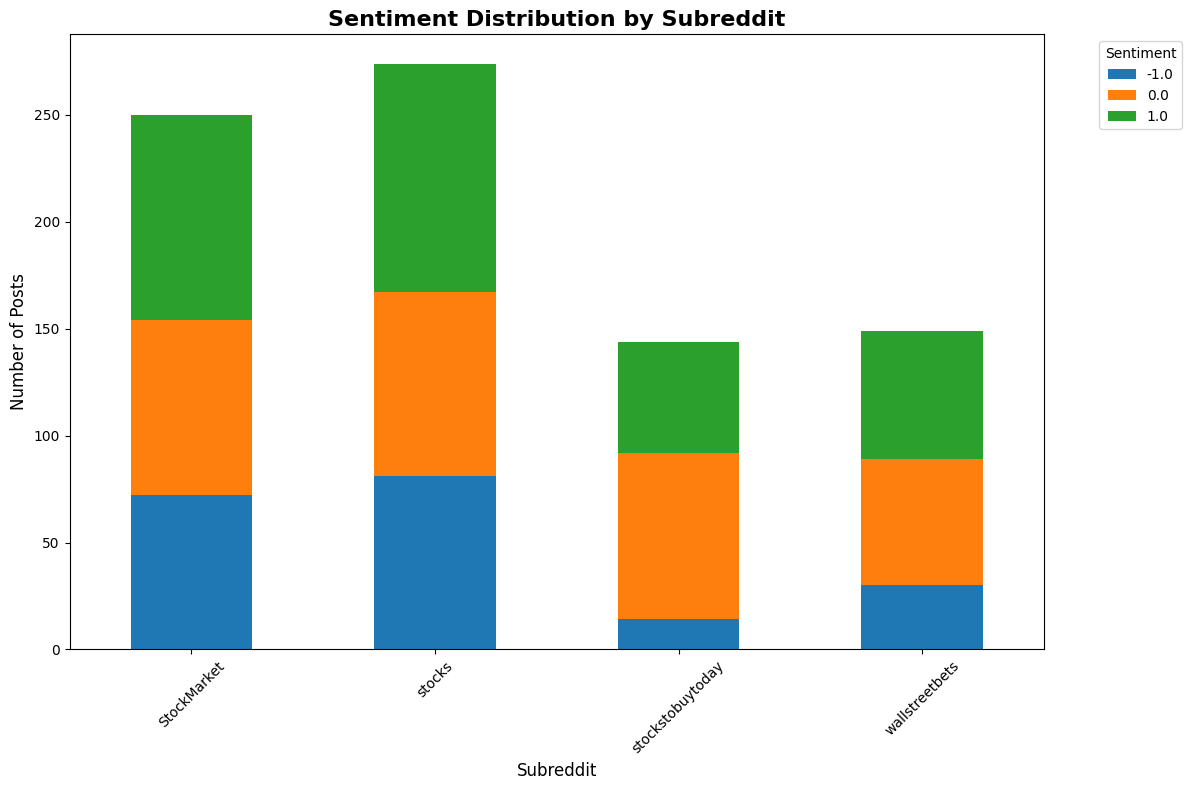

In [23]:
# Create a grouped bar chart showing sentiment distribution by subreddit
plt.figure(figsize=(12, 8))

# Create cross-tabulation
sentiment_subreddit = pd.crosstab(df['subreddit'], df['sentiment'])
sentiment_subreddit.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Sentiment Distribution by Subreddit', fontsize=16, fontweight='bold')
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Across all four subreddits the mood skews net positive, with r/stocks and r/StockMarket carrying the most volume and the largest counts of positive posts, r/stocksbuytoday showing the lowest negativity and a neutral-heavy, news-like tone, and r/wallstreetbets displaying a balanced split between neutral and positive with relatively few negatives; in short, bullish sentiment dominates—especially in r/stocks—while r/stocksbuytoday offers the calmest signal, and r/wallstreetbets remains upbeat but punchy; note this is a snapshot based on post counts (not intensity) and can shift with market news.

### Text Length Analysis

<Figure size 1200x800 with 0 Axes>

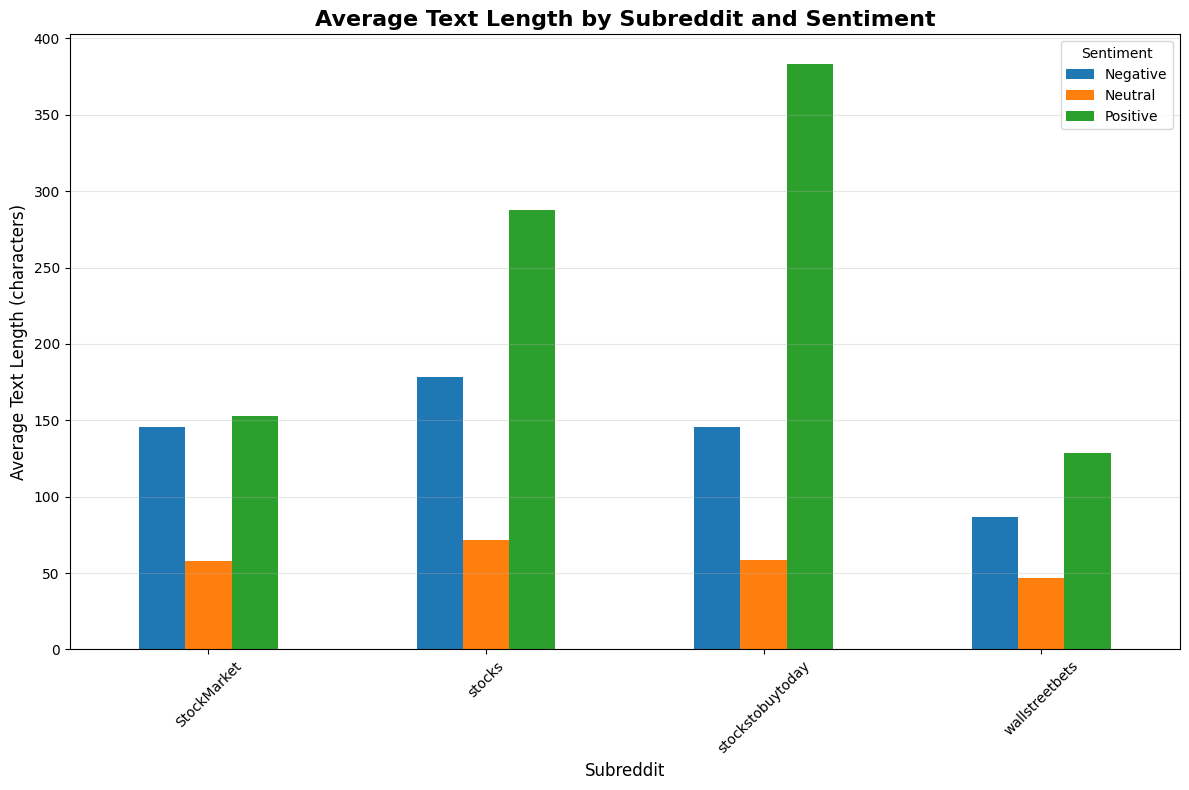

Average Text Length by Subreddit and Sentiment:
sentiment          -1.0   0.0    1.0
subreddit                           
StockMarket       145.8  57.9  152.9
stocks            178.1  71.5  287.6
stockstobuytoday  145.8  58.5  383.5
wallstreetbets     86.5  46.9  128.6


In [24]:
# Calculate average text length by sentiment and subreddit
avg_length = df.groupby(['subreddit', 'sentiment'])['text_length'].mean().unstack()

# Create the visualization
plt.figure(figsize=(12, 8))
avg_length.plot(kind='bar', figsize=(12, 8))

plt.title('Average Text Length by Subreddit and Sentiment', fontsize=16, fontweight='bold')
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Average Text Length (characters)', fontsize=12)
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Print the actual values for reference
print("Average Text Length by Subreddit and Sentiment:")
print(avg_length.round(1))

Positive posts are consistently the longest across all subreddits, neutral posts are the shortest, and negatives sit in between, most dramatically on r/stocksbuytoday, where positive texts are several times longer than neutral/negative ones. Subreddit style also matters: r/wallstreetbets is the most concise across sentiments, while r/stocks and r/stocksbuytoday feature much longer positive posts (and r/stocks has relatively long negatives, too). Together this suggests that longer, more detailed messages tend to be positive, but the strength of that pattern varies by community.

# Phase 2

## Phase 2: Advanced Data Mining Techniques

### 5.4.2 Frequent Pattern Mining

In this section, we'll mine frequent patterns from our Reddit sentiment dataset using the PAMI library, similar to the master notebook but adapted for sentiment analysis.


In [46]:
# Create term-document matrices by sentiment category
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialize CountVectorizer
count_vect = CountVectorizer()

# Create TDM for each sentiment category
sentiment_categories = ['negative', 'neutral', 'positive']
sentiment_labels = [-1.0, 0.0, 1.0]
filt_term_document_dfs = {}

print("Creating term-document matrices by sentiment category...")

for i, (sentiment, label) in enumerate(zip(sentiment_categories, sentiment_labels)):
    # Filter data by sentiment
    sentiment_data = df[df['sentiment'] == label]['text']
    
    # Create term-document matrix
    X_tdm = count_vect.fit_transform(sentiment_data)
    terms = count_vect.get_feature_names_out()
    
    # Convert to DataFrame
    tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=sentiment_data.index)
    filt_term_document_dfs[sentiment] = tdm_df
    
    print(f"{sentiment.capitalize()} sentiment: {tdm_df.shape[0]} documents, {tdm_df.shape[1]} terms")

print("\nTerm-document matrices created successfully!")


Creating term-document matrices by sentiment category...
Negative sentiment: 197 documents, 1631 terms
Neutral sentiment: 305 documents, 1241 terms
Positive sentiment: 315 documents, 3108 terms

Term-document matrices created successfully!


In [47]:
# Create frequency database files for pattern mining
import os

print("Creating frequency database files for PAMI pattern mining...")

for sentiment in sentiment_categories:
    tdm_df = filt_term_document_dfs[sentiment]
    
    # Create frequency database format for PAMI
    freq_db_data = []
    
    for idx, row in tdm_df.iterrows():
        # Get non-zero terms for this document
        non_zero_terms = row[row > 0].index.tolist()
        if non_zero_terms:  # Only include documents with at least one term
            freq_db_data.append('\t'.join(non_zero_terms))
    
    # Save to file
    filename = f'td_freq_db_{sentiment}.csv'
    with open(filename, 'w') as f:
        f.write('\n'.join(freq_db_data))
    
    print(f"Created {filename} with {len(freq_db_data)} documents")

print("\nFrequency database files created successfully!")


Creating frequency database files for PAMI pattern mining...
Created td_freq_db_negative.csv with 197 documents
Created td_freq_db_neutral.csv with 303 documents
Created td_freq_db_positive.csv with 315 documents

Frequency database files created successfully!


In [48]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

In [49]:
# Mine frequent patterns using PAMI FPGrowth
from PAMI.frequentPattern.basic import FPGrowth as alg

print("Mining frequent patterns using FPGrowth algorithm...")

# Set minimum support (adjust based on dataset size)
minSup = 9  # Minimum support threshold
pattern_dfs = {}

for sentiment in sentiment_categories:
    filename = f'td_freq_db_{sentiment}.csv'
    
    print(f"\nMining patterns for {sentiment} sentiment...")
    
    # Run FPGrowth algorithm
    obj = alg.FPGrowth(iFile=filename, minSup=minSup, sep='\t')
    obj.mine()
    
    # Get patterns as DataFrame
    patterns_df = obj.getPatternsAsDataFrame()
    pattern_dfs[sentiment] = patterns_df
    
    print(f"Found {len(patterns_df)} frequent patterns for {sentiment} sentiment")
    
    # Save patterns to file
    pattern_filename = f'freq_patterns_{sentiment}_minSup{minSup}.txt'
    with open(pattern_filename, 'w') as f:
        for _, row in patterns_df.iterrows():
            f.write(f"{row['Patterns']}:{row['Support']}\n")
    
    print(f"Patterns saved to {pattern_filename}")

print("\nPattern mining completed successfully!")


Mining frequent patterns using FPGrowth algorithm...

Mining patterns for negative sentiment...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Found 888 frequent patterns for negative sentiment
Patterns saved to freq_patterns_negative_minSup9.txt

Mining patterns for neutral sentiment...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Found 92 frequent patterns for neutral sentiment
Patterns saved to freq_patterns_neutral_minSup9.txt

Mining patterns for positive sentiment...
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Found 47994 frequent patterns for positive sentiment
Patterns saved to freq_patterns_positive_minSup9.txt

Pattern mining completed successfully!


In [50]:
# Merge patterns and create augmented TDM
print("Merging patterns and creating augmented term-document matrix...")

# Combine all patterns from different sentiments
all_patterns = []
for sentiment, patterns_df in pattern_dfs.items():
    for _, row in patterns_df.iterrows():
        all_patterns.append(row['Patterns'])

# Remove duplicates and create final pattern list
unique_patterns = list(set(all_patterns))
print(f"Total unique patterns found: {len(unique_patterns)}")

# Create pattern DataFrame
final_pattern_df = pd.DataFrame({'Patterns': unique_patterns})

# Create augmented TDM for the entire dataset
print("\nCreating augmented TDM...")

# Create TDM for entire dataset
count_vect_full = CountVectorizer()
X_tdm_full = count_vect_full.fit_transform(df['text'])
terms_full = count_vect_full.get_feature_names_out()
tdm_df_full = pd.DataFrame(X_tdm_full.toarray(), columns=terms_full, index=df.index)

# Tokenize texts for pattern matching
df['tokenized_text'] = df['text'].str.split().apply(set)

# Create pattern matrix
pattern_matrix = pd.DataFrame(0, index=df.index, columns=final_pattern_df['Patterns'])

# Check pattern presence in each document
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = df['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Concatenate TDM and pattern matrix
augmented_df = pd.concat([tdm_df_full, pattern_matrix], axis=1)

print(f"Original TDM shape: {tdm_df_full.shape}")
print(f"Pattern matrix shape: {pattern_matrix.shape}")
print(f"Augmented TDM shape: {augmented_df.shape}")

print("\nAugmented TDM created successfully!")


Merging patterns and creating augmented term-document matrix...
Total unique patterns found: 48196

Creating augmented TDM...
Original TDM shape: (817, 4315)
Pattern matrix shape: (817, 48196)
Augmented TDM shape: (817, 52511)

Augmented TDM created successfully!


### 5.5 Dimensionality Reduction

We'll apply different dimensionality reduction techniques (PCA, t-SNE, UMAP) to visualize our data in 2D space, comparing original TDM vs augmented TDM.


In [51]:
# Dimensionality Reduction: PCA, t-SNE, UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import numpy as np

print("Applying dimensionality reduction techniques...")

# Prepare data
X_original = tdm_df_full.values
X_augmented = augmented_df.values
y_labels = df['sentiment'].values

# Create sentiment labels for plotting
sentiment_names = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
y_names = [sentiment_names[label] for label in y_labels]

print(f"Original data shape: {X_original.shape}")
print(f"Augmented data shape: {X_augmented.shape}")

# Apply PCA
print("\nApplying PCA...")
pca_original = PCA(n_components=2, random_state=42)
pca_augmented = PCA(n_components=2, random_state=42)

X_pca_original = pca_original.fit_transform(X_original)
X_pca_augmented = pca_augmented.fit_transform(X_augmented)

print(f"PCA explained variance ratio (original): {pca_original.explained_variance_ratio_.sum():.3f}")
print(f"PCA explained variance ratio (augmented): {pca_augmented.explained_variance_ratio_.sum():.3f}")


Applying dimensionality reduction techniques...
Original data shape: (817, 4315)
Augmented data shape: (817, 52511)

Applying PCA...
PCA explained variance ratio (original): 0.318
PCA explained variance ratio (augmented): 0.333


In [52]:
# Apply t-SNE
print("Applying t-SNE...")
tsne_original = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_augmented = TSNE(n_components=2, random_state=42, perplexity=30)

X_tsne_original = tsne_original.fit_transform(X_original)
X_tsne_augmented = tsne_augmented.fit_transform(X_augmented)

print("t-SNE completed!")

# Apply UMAP
print("Applying UMAP...")
umap_original = umap.UMAP(n_components=2, random_state=42)
umap_augmented = umap.UMAP(n_components=2, random_state=42)

X_umap_original = umap_original.fit_transform(X_original)
X_umap_augmented = umap_augmented.fit_transform(X_augmented)

print("UMAP completed!")

print("\nAll dimensionality reduction techniques applied successfully!")


Applying t-SNE...
t-SNE completed!
Applying UMAP...


c:\Users\marvi\OneDrive\Desktop\Semester 5\資料探勘與應用\Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\marvi\OneDrive\Desktop\Semester 5\資料探勘與應用\Labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP completed!

All dimensionality reduction techniques applied successfully!


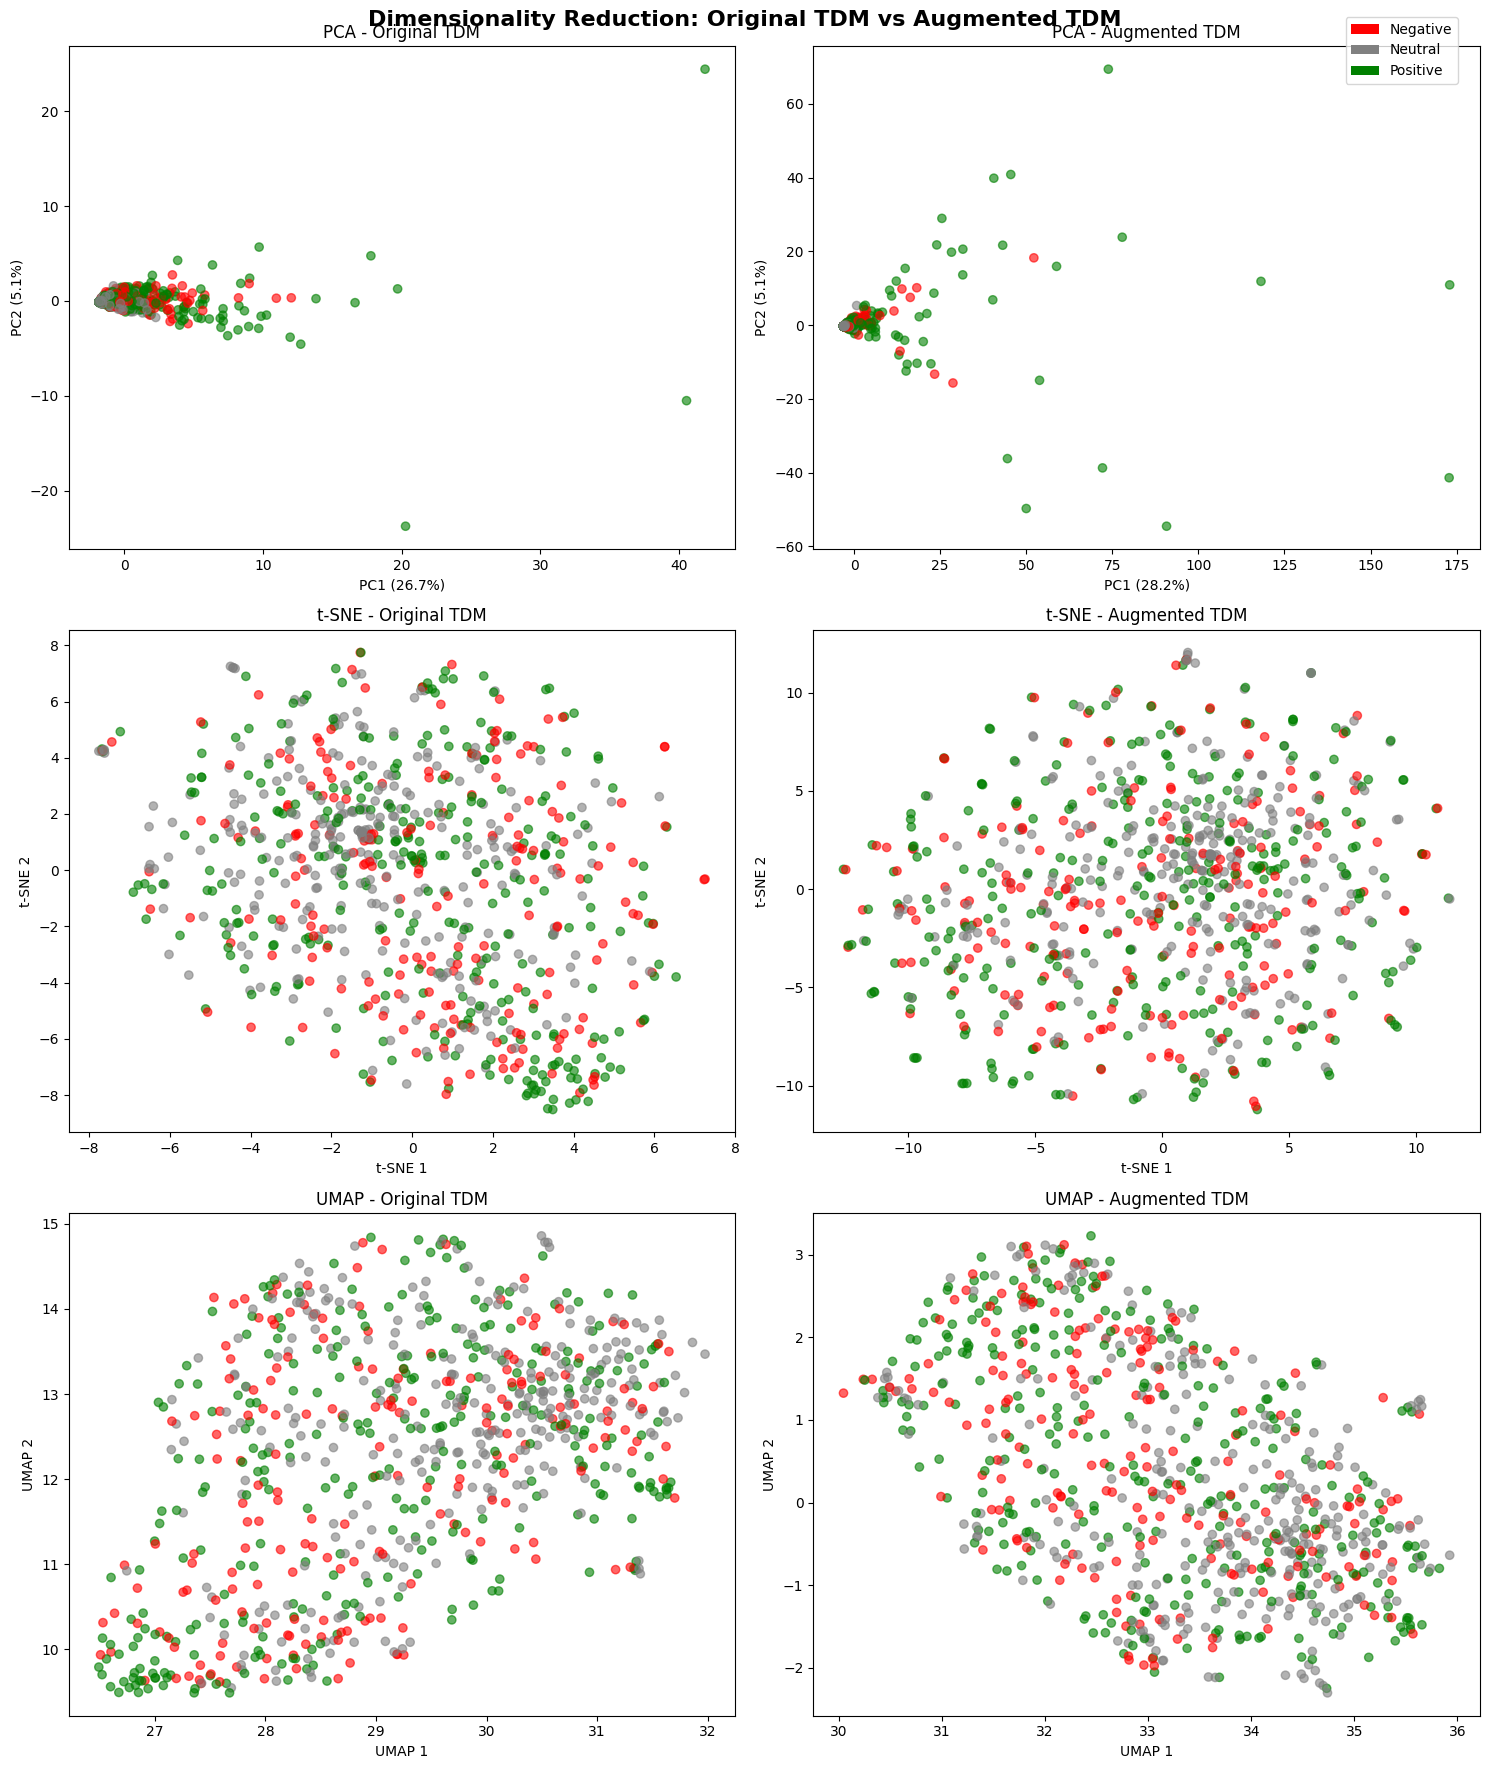

Dimensionality reduction visualizations completed!


In [53]:
# Create visualizations comparing original vs augmented TDM
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Dimensionality Reduction: Original TDM vs Augmented TDM', fontsize=16, fontweight='bold')

# Define colors for sentiment categories
colors = {'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'}

# PCA plots
axes[0, 0].scatter(X_pca_original[:, 0], X_pca_original[:, 1], c=[colors[name] for name in y_names], alpha=0.6)
axes[0, 0].set_title('PCA - Original TDM')
axes[0, 0].set_xlabel(f'PC1 ({pca_original.explained_variance_ratio_[0]:.1%})')
axes[0, 0].set_ylabel(f'PC2 ({pca_original.explained_variance_ratio_[1]:.1%})')

axes[0, 1].scatter(X_pca_augmented[:, 0], X_pca_augmented[:, 1], c=[colors[name] for name in y_names], alpha=0.6)
axes[0, 1].set_title('PCA - Augmented TDM')
axes[0, 1].set_xlabel(f'PC1 ({pca_augmented.explained_variance_ratio_[0]:.1%})')
axes[0, 1].set_ylabel(f'PC2 ({pca_augmented.explained_variance_ratio_[1]:.1%})')

# t-SNE plots
axes[1, 0].scatter(X_tsne_original[:, 0], X_tsne_original[:, 1], c=[colors[name] for name in y_names], alpha=0.6)
axes[1, 0].set_title('t-SNE - Original TDM')
axes[1, 0].set_xlabel('t-SNE 1')
axes[1, 0].set_ylabel('t-SNE 2')

axes[1, 1].scatter(X_tsne_augmented[:, 0], X_tsne_augmented[:, 1], c=[colors[name] for name in y_names], alpha=0.6)
axes[1, 1].set_title('t-SNE - Augmented TDM')
axes[1, 1].set_xlabel('t-SNE 1')
axes[1, 1].set_ylabel('t-SNE 2')

# UMAP plots
axes[2, 0].scatter(X_umap_original[:, 0], X_umap_original[:, 1], c=[colors[name] for name in y_names], alpha=0.6)
axes[2, 0].set_title('UMAP - Original TDM')
axes[2, 0].set_xlabel('UMAP 1')
axes[2, 0].set_ylabel('UMAP 2')

axes[2, 1].scatter(X_umap_augmented[:, 0], X_umap_augmented[:, 1], c=[colors[name] for name in y_names], alpha=0.6)
axes[2, 1].set_title('UMAP - Augmented TDM')
axes[2, 1].set_xlabel('UMAP 1')
axes[2, 1].set_ylabel('UMAP 2')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=label) for label, color in colors.items()]
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.98))

plt.tight_layout()
plt.show()

print("Dimensionality reduction visualizations completed!")


### 5.6 Discretization and Binarization

We'll demonstrate binarization of categorical variables using LabelBinarizer on our sentiment labels.


In [54]:
# Discretization and Binarization
from sklearn.preprocessing import LabelBinarizer

print("Demonstrating binarization of sentiment labels...")

# Original sentiment labels
print("Original sentiment labels:")
print(f"Unique values: {df['sentiment'].unique()}")
print(f"Value counts:\n{df['sentiment'].value_counts().sort_index()}")

# Apply LabelBinarizer
lb = LabelBinarizer()
sentiment_binary = lb.fit_transform(df['sentiment'])

# Convert to DataFrame for better visualization
sentiment_binary_df = pd.DataFrame(sentiment_binary, columns=lb.classes_)
sentiment_binary_df.index = df.index

print(f"\nBinarized sentiment matrix shape: {sentiment_binary_df.shape}")
print("\nFirst 10 rows of binarized sentiment:")
print(sentiment_binary_df.head(10))

print(f"\nClass labels: {lb.classes_}")
print("Binarization completed successfully!")


Demonstrating binarization of sentiment labels...
Original sentiment labels:
Unique values: [-1.  1.  0.]
Value counts:
sentiment
-1.0    197
 0.0    305
 1.0    315
Name: count, dtype: int64

Binarized sentiment matrix shape: (817, 3)

First 10 rows of binarized sentiment:
   -1.0   0.0   1.0
0     1     0     0
1     0     0     1
2     0     1     0
3     0     0     1
4     0     1     0
5     0     0     1
6     1     0     0
7     0     0     1
8     0     0     1
9     0     1     0

Class labels: [-1.  0.  1.]
Binarization completed successfully!


## 6. Data Exploration

We'll explore our data by selecting random texts and calculating cosine similarity between them to understand document relationships.


In [55]:
# Data Exploration: Cosine Similarity Analysis
from sklearn.metrics.pairwise import cosine_similarity
import random

print("Data Exploration: Analyzing cosine similarity between documents...")

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

# Select 3 random texts from different sentiment categories
selected_texts = []
selected_indices = []

# Select one text from each sentiment category
for sentiment_label in [-1.0, 0.0, 1.0]:
    sentiment_data = df[df['sentiment'] == sentiment_label]
    if len(sentiment_data) > 0:
        # Convert index to list to avoid pandas Index ambiguity
        random_idx = random.choice(sentiment_data.index.tolist())
        selected_texts.append(df.loc[random_idx, 'text'])
        selected_indices.append(random_idx)

print(f"Selected {len(selected_texts)} texts for analysis:")
for i, (idx, text) in enumerate(zip(selected_indices, selected_texts)):
    sentiment_name = sentiment_names[df.loc[idx, 'sentiment']]
    print(f"\nText {i+1} (Index: {idx}, Sentiment: {sentiment_name}):")
    print(f"'{text[:100]}...'")  # Show first 100 characters


Data Exploration: Analyzing cosine similarity between documents...
Selected 3 texts for analysis:

Text 1 (Index: 673, Sentiment: Negative):
'Agreed. I think the pause is basically going to be remembered as a dead cat bounce. Foreign investor...'

Text 2 (Index: 173, Sentiment: Neutral):
'Add MIK...'

Text 3 (Index: 28, Sentiment: Positive):
'My first wife was tarded, she's a pilot now....'


In [56]:
# Transform selected texts using CountVectorizer
print("\nTransforming texts using CountVectorizer...")

# Use the same CountVectorizer that was used for the full dataset
text_vectors = []
for text in selected_texts:
    vector = count_vect_full.transform([text])
    text_vectors.append(vector)

# Calculate cosine similarity between all pairs
print("\nCalculating cosine similarity between text pairs:")

similarity_matrix = np.zeros((len(selected_texts), len(selected_texts)))

for i in range(len(selected_texts)):
    for j in range(len(selected_texts)):
        if i != j:
            similarity = cosine_similarity(text_vectors[i], text_vectors[j], dense_output=True)[0][0]
            similarity_matrix[i, j] = similarity
            
            text1_sentiment = sentiment_names[df.loc[selected_indices[i], 'sentiment']]
            text2_sentiment = sentiment_names[df.loc[selected_indices[j], 'sentiment']]
            
            print(f"Text {i+1} ({text1_sentiment}) vs Text {j+1} ({text2_sentiment}): {similarity:.4f}")

print("\nCosine similarity analysis completed!")



Transforming texts using CountVectorizer...

Calculating cosine similarity between text pairs:
Text 1 (Negative) vs Text 2 (Neutral): 0.0000
Text 1 (Negative) vs Text 3 (Positive): 0.0367
Text 2 (Neutral) vs Text 1 (Negative): 0.0000
Text 2 (Neutral) vs Text 3 (Positive): 0.0000
Text 3 (Positive) vs Text 1 (Negative): 0.0367
Text 3 (Positive) vs Text 2 (Neutral): 0.0000

Cosine similarity analysis completed!


## 7. Data Classification

We'll implement basic classification using Naive Bayes on both original TDM and augmented TDM to compare performance.


In [57]:
# Basic Classification: Naive Bayes on Original TDM
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

print("Basic Classification: Naive Bayes on Original TDM")

# Prepare data
X_features = tdm_df_full
y_labels = df['sentiment']

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_features, y_labels, test_size=0.3, random_state=42
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate performance
accuracy_original = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (Original TDM): {accuracy_original:.4f}")

# Classification report
target_names = ['Negative', 'Neutral', 'Positive']
print(f"\nClassification Report (Original TDM):")
print(classification_report(y_test, y_pred, target_names=target_names, digits=4))


Basic Classification: Naive Bayes on Original TDM
Training set size: 571
Test set size: 246

Accuracy (Original TDM): 0.5081

Classification Report (Original TDM):
              precision    recall  f1-score   support

    Negative     0.3333    0.2941    0.3125        51
     Neutral     0.5897    0.2840    0.3833        81
    Positive     0.5370    0.7632    0.6304       114

    accuracy                         0.5081       246
   macro avg     0.4867    0.4471    0.4421       246
weighted avg     0.5122    0.5081    0.4832       246



In [58]:
# Basic Classification: Naive Bayes on Augmented TDM
print("\n" + "="*50)
print("Basic Classification: Naive Bayes on Augmented TDM")

# Prepare augmented data
X_features_aug = augmented_df
y_labels_aug = df['sentiment']

# Split augmented data into training and testing sets (70% train, 30% test)
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    X_features_aug, y_labels_aug, test_size=0.3, random_state=42
)

print(f"Training set size (augmented): {X_train_aug.shape[0]}")
print(f"Test set size (augmented): {X_test_aug.shape[0]}")
print(f"Feature dimensions (augmented): {X_train_aug.shape[1]}")

# Train Naive Bayes classifier on augmented data
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)

# Make predictions
y_pred_aug = nb_classifier_aug.predict(X_test_aug)

# Evaluate performance
accuracy_augmented = accuracy_score(y_test_aug, y_pred_aug)
print(f"\nAccuracy (Augmented TDM): {accuracy_augmented:.4f}")

# Classification report
print(f"\nClassification Report (Augmented TDM):")
print(classification_report(y_test_aug, y_pred_aug, target_names=target_names, digits=4))

# Compare results
print(f"\n" + "="*50)
print("COMPARISON SUMMARY:")
print(f"Original TDM Accuracy:  {accuracy_original:.4f}")
print(f"Augmented TDM Accuracy: {accuracy_augmented:.4f}")
print(f"Improvement: {accuracy_augmented - accuracy_original:+.4f}")



Basic Classification: Naive Bayes on Augmented TDM
Training set size (augmented): 571
Test set size (augmented): 246
Feature dimensions (augmented): 52511

Accuracy (Augmented TDM): 0.4390

Classification Report (Augmented TDM):
              precision    recall  f1-score   support

    Negative     0.2785    0.4314    0.3385        51
     Neutral     0.4453    0.7531    0.5596        81
    Positive     0.8333    0.2193    0.3472       114

    accuracy                         0.4390       246
   macro avg     0.5190    0.4679    0.4151       246
weighted avg     0.5905    0.4390    0.4153       246


COMPARISON SUMMARY:
Original TDM Accuracy:  0.5081
Augmented TDM Accuracy: 0.4390
Improvement: -0.0691


## Part 3: TF-IDF Analysis (20% Grade)

This section implements TF-IDF features and compares different Naive Bayes classifiers as required by the assignment.


In [59]:
# 3a. TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

print("3a. Creating TF-IDF Features")
print("="*40)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# Convert to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), 
                        columns=tfidf_vectorizer.get_feature_names_out(), 
                        index=df.index)

print(f"TF-IDF matrix shape: {tfidf_df.shape}")
print(f"Vocabulary size: {len(tfidf_vectorizer.get_feature_names_out())}")

# Show sample TF-IDF values
print(f"\nSample TF-IDF values for first document:")
sample_doc_idx = df.index[0]
sample_tfidf = tfidf_df.loc[sample_doc_idx]
non_zero_tfidf = sample_tfidf[sample_tfidf > 0].sort_values(ascending=False)
print(f"Top 10 TF-IDF values for document {sample_doc_idx}:")
print(non_zero_tfidf.head(10))

print(f"\nTF-IDF vectorization completed successfully!")


3a. Creating TF-IDF Features
TF-IDF matrix shape: (817, 4315)
Vocabulary size: 4315

Sample TF-IDF values for first document:
Top 10 TF-IDF values for document 0:
retards    0.732738
calls      0.596098
on         0.328272
Name: 0, dtype: float64

TF-IDF vectorization completed successfully!


In [60]:
# 3b. Two Naive Bayes Classifiers
print("\n3b. Implementing Two Naive Bayes Classifiers")
print("="*50)

# Prepare data for both classifiers
y_labels = df['sentiment']

# Classifier 1: MultinomialNB with word frequency (CountVectorizer)
print("\nClassifier 1: MultinomialNB with Word Frequency Features")
print("-" * 50)

# Use the original TDM (CountVectorizer features)
X_train_freq, X_test_freq, y_train_freq, y_test_freq = train_test_split(
    tdm_df_full, y_labels, test_size=0.3, random_state=42
)

# Train MultinomialNB on frequency features
nb_freq = MultinomialNB()
nb_freq.fit(X_train_freq, y_train_freq)

# Make predictions and evaluate
y_pred_freq = nb_freq.predict(X_test_freq)
accuracy_freq = accuracy_score(y_test_freq, y_pred_freq)

print(f"Accuracy (Word Frequency): {accuracy_freq:.4f}")
print(f"\nClassification Report (Word Frequency):")
print(classification_report(y_test_freq, y_pred_freq, target_names=target_names, digits=4))



3b. Implementing Two Naive Bayes Classifiers

Classifier 1: MultinomialNB with Word Frequency Features
--------------------------------------------------
Accuracy (Word Frequency): 0.5081

Classification Report (Word Frequency):
              precision    recall  f1-score   support

    Negative     0.3333    0.2941    0.3125        51
     Neutral     0.5897    0.2840    0.3833        81
    Positive     0.5370    0.7632    0.6304       114

    accuracy                         0.5081       246
   macro avg     0.4867    0.4471    0.4421       246
weighted avg     0.5122    0.5081    0.4832       246



In [61]:
# Classifier 2: MultinomialNB with TF-IDF features
print("\nClassifier 2: MultinomialNB with TF-IDF Features")
print("-" * 50)

# Split TF-IDF data
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    tfidf_df, y_labels, test_size=0.3, random_state=42
)

# Train MultinomialNB on TF-IDF features
# Note: MultinomialNB works with TF-IDF because TF-IDF values are non-negative
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Make predictions and evaluate
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)

print(f"Accuracy (TF-IDF): {accuracy_tfidf:.4f}")
print(f"\nClassification Report (TF-IDF):")
print(classification_report(y_test_tfidf, y_pred_tfidf, target_names=target_names, digits=4))

# Compare the two classifiers
print(f"\n" + "="*50)
print("COMPARISON: Word Frequency vs TF-IDF")
print("="*50)
print(f"Word Frequency Accuracy: {accuracy_freq:.4f}")
print(f"TF-IDF Accuracy:         {accuracy_tfidf:.4f}")
print(f"Difference:              {accuracy_tfidf - accuracy_freq:+.4f}")

if accuracy_tfidf > accuracy_freq:
    print("TF-IDF performs better than word frequency!")
elif accuracy_freq > accuracy_tfidf:
    print("Word frequency performs better than TF-IDF!")
else:
    print("Both methods perform equally well!")



Classifier 2: MultinomialNB with TF-IDF Features
--------------------------------------------------
Accuracy (TF-IDF): 0.5894

Classification Report (TF-IDF):
              precision    recall  f1-score   support

    Negative     1.0000    0.0784    0.1455        51
     Neutral     0.6557    0.4938    0.5634        81
    Positive     0.5580    0.8860    0.6847       114

    accuracy                         0.5894       246
   macro avg     0.7379    0.4861    0.4645       246
weighted avg     0.6818    0.5894    0.5330       246


COMPARISON: Word Frequency vs TF-IDF
Word Frequency Accuracy: 0.5081
TF-IDF Accuracy:         0.5894
Difference:              +0.0813
TF-IDF performs better than word frequency!


In [62]:
# 3c. Pattern Augmentation Comparison with TF-IDF
print("\n3c. Pattern Augmentation with TF-IDF")
print("="*40)

# Create augmented TF-IDF by concatenating TF-IDF with pattern matrix
print("Creating augmented TF-IDF features...")

# Ensure pattern_matrix has the same index as tfidf_df
pattern_matrix_aligned = pattern_matrix.reindex(tfidf_df.index, fill_value=0)

# Concatenate TF-IDF with pattern matrix
augmented_tfidf_df = pd.concat([tfidf_df, pattern_matrix_aligned], axis=1)

print(f"Original TF-IDF shape: {tfidf_df.shape}")
print(f"Pattern matrix shape: {pattern_matrix_aligned.shape}")
print(f"Augmented TF-IDF shape: {augmented_tfidf_df.shape}")

# Train classifier on augmented TF-IDF
print("\nTraining MultinomialNB on Augmented TF-IDF...")

X_train_aug_tfidf, X_test_aug_tfidf, y_train_aug_tfidf, y_test_aug_tfidf = train_test_split(
    augmented_tfidf_df, y_labels, test_size=0.3, random_state=42
)

nb_aug_tfidf = MultinomialNB()
nb_aug_tfidf.fit(X_train_aug_tfidf, y_train_aug_tfidf)

# Make predictions and evaluate
y_pred_aug_tfidf = nb_aug_tfidf.predict(X_test_aug_tfidf)
accuracy_aug_tfidf = accuracy_score(y_test_aug_tfidf, y_pred_aug_tfidf)

print(f"Accuracy (Augmented TF-IDF): {accuracy_aug_tfidf:.4f}")
print(f"\nClassification Report (Augmented TF-IDF):")
print(classification_report(y_test_aug_tfidf, y_pred_aug_tfidf, target_names=target_names, digits=4))



3c. Pattern Augmentation with TF-IDF
Creating augmented TF-IDF features...
Original TF-IDF shape: (817, 4315)
Pattern matrix shape: (817, 48196)
Augmented TF-IDF shape: (817, 52511)

Training MultinomialNB on Augmented TF-IDF...
Accuracy (Augmented TF-IDF): 0.4350

Classification Report (Augmented TF-IDF):
              precision    recall  f1-score   support

    Negative     0.2692    0.4118    0.3256        51
     Neutral     0.4545    0.7407    0.5634        81
    Positive     0.7222    0.2281    0.3467       114

    accuracy                         0.4350       246
   macro avg     0.4820    0.4602    0.4119       246
weighted avg     0.5402    0.4350    0.4137       246



In [63]:
# Final Comparison and Analysis
print("\n" + "="*60)
print("FINAL TF-IDF ANALYSIS SUMMARY")
print("="*60)

print(f"1. Word Frequency (CountVectorizer):     {accuracy_freq:.4f}")
print(f"2. TF-IDF Features:                     {accuracy_tfidf:.4f}")
print(f"3. Augmented TF-IDF (with patterns):    {accuracy_aug_tfidf:.4f}")

print(f"\nImprovements:")
print(f"TF-IDF vs Word Frequency:               {accuracy_tfidf - accuracy_freq:+.4f}")
print(f"Augmented TF-IDF vs TF-IDF:             {accuracy_aug_tfidf - accuracy_tfidf:+.4f}")
print(f"Augmented TF-IDF vs Word Frequency:     {accuracy_aug_tfidf - accuracy_freq:+.4f}")

print(f"\nComments on Differences:")
print("-" * 30)
print("1. TF-IDF vs Word Frequency:")
if accuracy_tfidf > accuracy_freq:
    print("   TF-IDF performs better because it reduces the impact of common words")
    print("   and emphasizes distinctive terms that are more informative for classification.")
else:
    print("   Word frequency performs better, possibly because the dataset")
    print("   benefits from raw frequency counts rather than normalized weights.")

print("\n2. Pattern Augmentation:")
if accuracy_aug_tfidf > accuracy_tfidf:
    print("   Adding frequent patterns improves performance by capturing")
    print("   important word combinations that individual TF-IDF features miss.")
else:
    print("   Pattern augmentation doesn't improve performance, suggesting")
    print("   that TF-IDF features already capture the most important information.")

print(f"\nTF-IDF Analysis completed successfully!")



FINAL TF-IDF ANALYSIS SUMMARY
1. Word Frequency (CountVectorizer):     0.5081
2. TF-IDF Features:                     0.5894
3. Augmented TF-IDF (with patterns):    0.4350

Improvements:
TF-IDF vs Word Frequency:               +0.0813
Augmented TF-IDF vs TF-IDF:             -0.1545
Augmented TF-IDF vs Word Frequency:     -0.0732

Comments on Differences:
------------------------------
1. TF-IDF vs Word Frequency:
   TF-IDF performs better because it reduces the impact of common words
   and emphasizes distinctive terms that are more informative for classification.

2. Pattern Augmentation:
   Pattern augmentation doesn't improve performance, suggesting
   that TF-IDF features already capture the most important information.

TF-IDF Analysis completed successfully!


## Part 4: Data Preprocessing Critique (10% Grade)

### Inefficiencies and Improvements for Reddit Stock Sentiment Data

• **Basic tokenization**: Simjkple `str.split()` misses Reddit formatting, URLs, stock tickers ($AAPL)

• **No text normalization**: "Apple" vs "apple" treated as different words, losing semantic meaning  

• **Missing Reddit-specific handling**: Emojis (🚀), user mentions (u/username), subreddit links ignored

• **No feature selection**: 52,511 features for 817 samples causes curse of dimensionality

• **Class imbalance ignored**: Uneven distribution (51:81:114) hurts minority class performance
